In [56]:
import pandas as pd
# Loading dataset (header row is row 2 in the Excel file)
df = pd.read_excel("Raw Data.xls",header=1)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 42 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                                                                                                                                   

In [57]:
# CLEANING COLUMN NAMES FIRST
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True).str.strip()


In [58]:
df.head()


,1. Year of birth:,2. Gender,3. What is the socio-economic status of your home?,"4. According to your culture, people, or physical features, you are or are recognized as:",5.1 How many years of education did your parents receive? Father,5.2 How many years of education did your parents receive? Mother,"6. In general, how satisfied are you with all aspects of your life?",7. How happy did you feel yesterday?,8. How much did you laugh yesterday?,9. Did you learn new or exciting things yesterday?,...,"17.7 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Feeling afraid, as if something awful might happen","18.1 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Little interest or pleasure in doing things","18.2 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Feeling down, depressed, or hopeless","18.3 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Trouble falling or staying asleep, or sleeping too much","18.4 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Feeling tired or having little energy","18.5 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Poor appetite or overeating","18.6 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Feeling bad about yourself or that you are a failure or have let yourself or your family down","18.7 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Trouble concentrating on things, such as reading the newspaper or watching television","18.8 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Moving or speaking so slowly that other people could have noticed. Or the opposite being so figety or restless that you have been moving around a lot more than usual","18.9 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3

In [59]:
rename_map = {
    '1. Year of birth:': 'birth_year',
    '2. Gender': 'gender',
    '3. What is the socio-economic status of your home?': 'SES',
    '4. According to your culture, people, or physical features, you are or are recognized as:': 'ethnicity',
    '5.1 How many years of education did your parents receive? Father': 'father_edu',
    '5.2 How many years of education did your parents receive? Mother': 'mother_edu',
    '6. In general, how satisfied are you with all aspects of your life?': 'life_satisfaction',
    '7. How happy did you feel yesterday?': 'happiness',
    '8. How much did you laugh yesterday?': 'laughter',
    '9. Did you learn new or exciting things yesterday?': 'learning',
    '10. How much did you enjoy the activities you did yesterday?': 'enjoyment',
    '11. How worried did you feel yesterday?': 'worry',
    '12. How depressed did you feel yesterday?': 'depression',
    '13. How angry did you feel yesterday?': 'anger',
    '14. How much stress did you feel yesterday?': 'stress',
    '15. How lonely or unsupported did you feel yesterday?': 'loneliness',


}


In [60]:
df = df.rename(columns=rename_map)


In [61]:
import re

def rename_scale_items(col):
    col_stripped = col.strip()

    # PSS naming from pss1 to pss10
    match_pss = re.match(r"16\.(\d+)\b", col_stripped)
    if match_pss:
        num = int(match_pss.group(1))
        return f"PSS{num}"

    # GAD naming from gad1 to gad7
    match_gad = re.match(r"17\.(\d+)\b", col_stripped)
    if match_gad:
        num = int(match_gad.group(1))
        return f"GAD{num}"

    # PHQ naming from phq1 to phq9
    match_phq = re.match(r"18\.(\d+)\b", col_stripped)
    if match_phq:
        num = int(match_phq.group(1))
        return f"PHQ{num}"

    return col

df.columns = [rename_scale_items(c) for c in df.columns]


In [62]:
df.columns

Index(['birth_year', 'gender', 'SES', 'ethnicity', 'father_edu', 'mother_edu',
       'life_satisfaction', 'happiness', 'laughter', 'learning', 'enjoyment',
       'worry', 'depression', 'anger', 'stress', 'loneliness', 'PSS1', 'PSS2',
       'PSS3', 'PSS4', 'PSS5', 'PSS6', 'PSS7', 'PSS8', 'PSS9', 'PSS10', 'GAD1',
       'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'PHQ1', 'PHQ2', 'PHQ3',
       'PHQ4', 'PHQ5', 'PHQ6', 'PHQ7', 'PHQ8', 'PHQ9'],
      dtype='object')

In [65]:
pss_items = [f"PSS{i}" for i in range(1, 11)]
gad_items = [f"GAD{i}" for i in range(1, 8)]
phq_items = [f"PHQ{i}" for i in range(1, 10)]

symptom_items = pss_items + gad_items + phq_items


In [66]:
#Applying median imputation
df[symptom_items] = df[symptom_items].fillna(df[symptom_items].median())


In [70]:
#Calculating age
df['age'] = 2022 - df['birth_year']

In [71]:
#Bining into four age groups
df['age_group'] = pd.cut(
    df['age'],
    bins=[17, 25, 35, 50, 120],
    labels=['18–25', '26–35', '36–50', '51+']
)


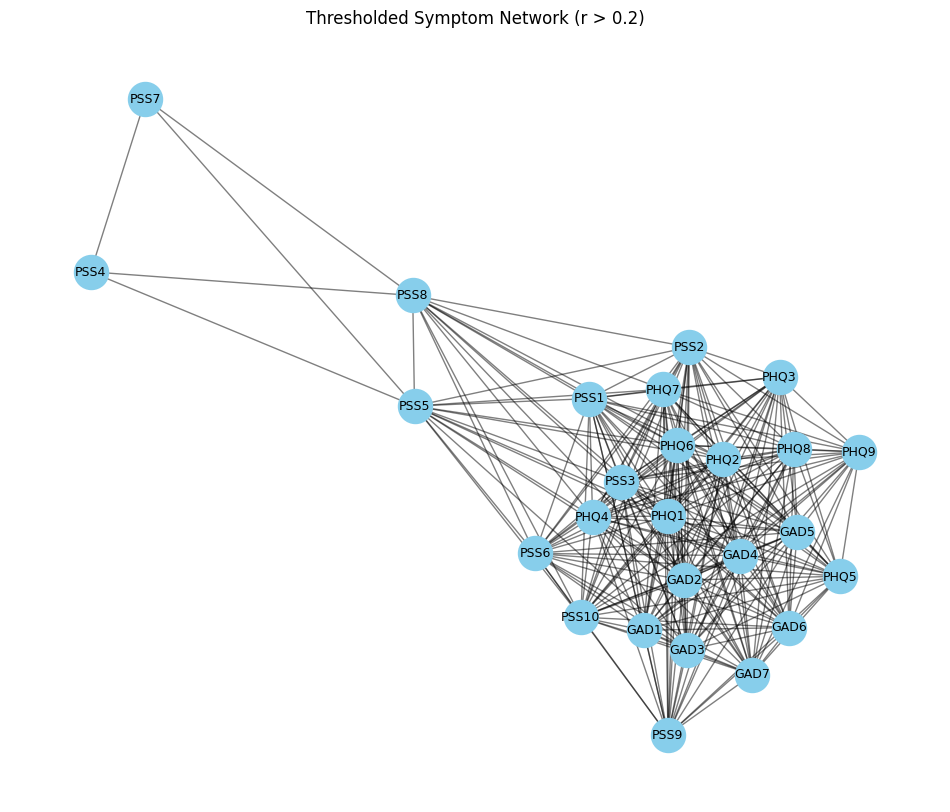

In [72]:
# Building full correlation matrix with absolute values
corr_matrix = df[symptom_items].corr().abs()

# Building initial graph
import networkx as nx
G = nx.from_pandas_adjacency(corr_matrix)

# Removing self-loops
G.remove_edges_from(nx.selfloop_edges(G))

# Thresholded graph
import matplotlib.pyplot as plt

threshold = 0.20
G_thresh = nx.Graph()

for u, v, d in G.edges(data=True):
    if d["weight"] > threshold:
        G_thresh.add_edge(u, v, weight=d["weight"])

# Removing isolated nodes
G_thresh.remove_nodes_from(list(nx.isolates(G_thresh)))

# Visualization
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_thresh, seed=42)

nx.draw_networkx_nodes(G_thresh, pos, node_color='skyblue', node_size=600)
nx.draw_networkx_edges(G_thresh, pos, alpha=0.5)
nx.draw_networkx_labels(G_thresh, pos, font_size=9)

plt.title(f"Thresholded Symptom Network (r > {threshold})")
plt.axis("off")
plt.show()


In [73]:
import networkx as nx

G = nx.from_pandas_adjacency(corr_matrix)
G.remove_edges_from(nx.selfloop_edges(G))


In [74]:
# Finding communities
from community import community_louvain

louvain_partition = community_louvain.best_partition(G, weight='weight')
louvain_partition


{'PSS1': 0,
 'PSS2': 0,
 'PSS3': 0,
 'PSS4': 0,
 'PSS5': 0,
 'PSS6': 0,
 'PSS7': 0,
 'PSS8': 0,
 'PSS9': 0,
 'PSS10': 0,
 'GAD1': 1,
 'GAD2': 1,
 'GAD3': 1,
 'GAD4': 1,
 'GAD5': 1,
 'GAD6': 1,
 'GAD7': 1,
 'PHQ1': 1,
 'PHQ2': 1,
 'PHQ3': 1,
 'PHQ4': 1,
 'PHQ5': 1,
 'PHQ6': 1,
 'PHQ7': 1,
 'PHQ8': 1,
 'PHQ9': 1}

In [75]:
num_comms = len(set(louvain_partition.values()))
num_comms


2

In [78]:
import networkx as nx
from community import community_louvain

age_networks = {}
age_partitions = {}

age_groups = df['age_group'].dropna().unique()

for group in age_groups:
    sub = df[df['age_group'] == group]

#using absolute value of correaltion because louvain works only on nonnegative value
    corr = sub[symptom_items].corr().abs()

    G_sub = nx.from_pandas_adjacency(corr)
    G_sub.remove_edges_from(nx.selfloop_edges(G_sub))

    age_networks[group] = G_sub
    age_partitions[group] = community_louvain.best_partition(G_sub, weight="weight")


In [79]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Defining correct order of age groups for consistent comparison
age_groups_ordered = ['18–25', '26–35', '36–50', '51+']

print("\nCommunity Similarity Across Age Groups (ARI & NMI):\n")

for i in range(len(age_groups_ordered)):
    for j in range(i+1, len(age_groups_ordered)):
        g1, g2 = age_groups_ordered[i], age_groups_ordered[j]

        # Extracting community labels
        labels1 = list(age_partitions[g1].values())
        labels2 = list(age_partitions[g2].values())

        # Computing ARI and NMI
        ari = adjusted_rand_score(labels1, labels2)
        nmi = normalized_mutual_info_score(labels1, labels2)

        print(f"{g1} vs {g2}:    ARI={ari:.3f}  , NMI={nmi:.3f}")



Community Similarity Across Age Groups (ARI & NMI):

18–25 vs 26–35:    ARI=0.853  , NMI=0.837
18–25 vs 36–50:    ARI=0.853  , NMI=0.837
18–25 vs 51+:    ARI=0.585  , NMI=0.561
26–35 vs 36–50:    ARI=1.000  , NMI=1.000
26–35 vs 51+:    ARI=0.574  , NMI=0.557
36–50 vs 51+:    ARI=0.574  , NMI=0.557


In [80]:
G_full = nx.from_pandas_adjacency(df[symptom_items].corr().abs())
pos = nx.spring_layout(G_full, seed=42)


In [81]:
def plot_age_group(group, G_sub, partition, pos):
    plt.figure(figsize=(10, 8))
    colors = [partition[node] for node in G_sub.nodes()]

    nx.draw_networkx_nodes(G_sub, pos, node_color=colors, cmap='viridis', node_size=600)
    nx.draw_networkx_edges(G_sub, pos, alpha=0.4)
    nx.draw_networkx_labels(G_sub, pos, font_size=9)

    plt.title(f"Louvain Symptom Network – Age Group: {group}")
    plt.axis("off")
    plt.show()


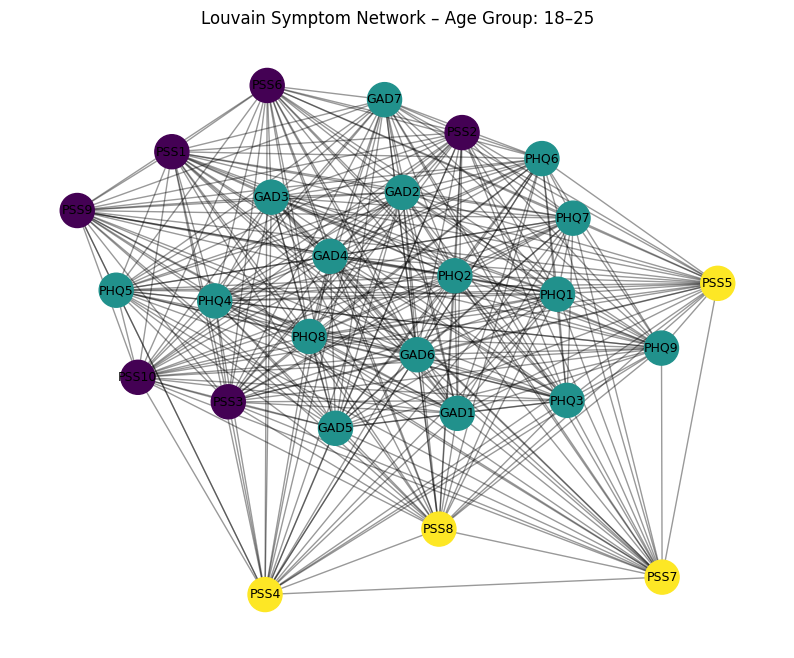

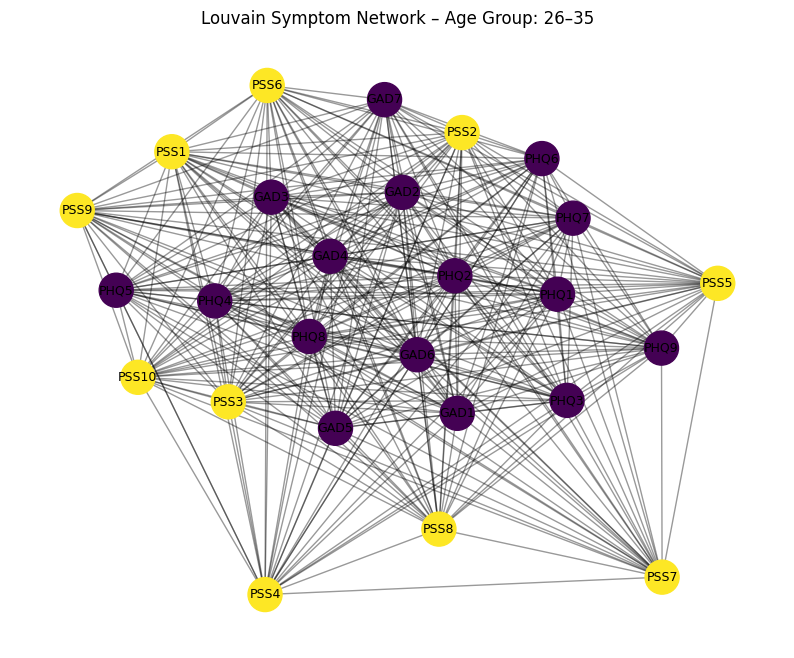

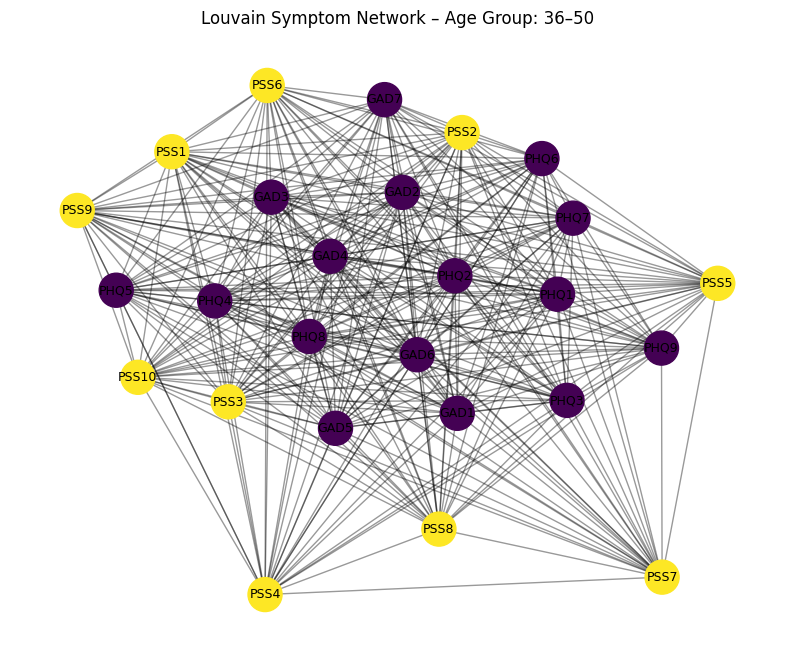

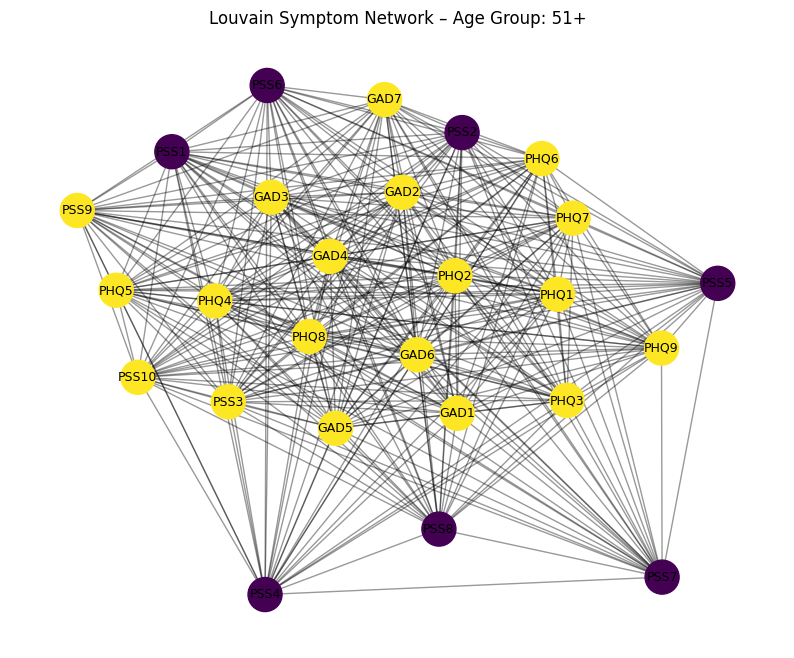

In [82]:
age_groups = ['18–25', '26–35', '36–50', '51+']

for group in age_groups:
    plot_age_group(group, age_networks[group], age_partitions[group], pos)


In [83]:
print("18–25:", age_partitions['18–25'])
print("26–35:", age_partitions['26–35'])
print("36–50:", age_partitions['36–50'])
print("51+:", age_partitions['51+'])


18–25: {'PSS1': 0, 'PSS2': 0, 'PSS3': 0, 'PSS4': 2, 'PSS5': 2, 'PSS6': 0, 'PSS7': 2, 'PSS8': 2, 'PSS9': 0, 'PSS10': 0, 'GAD1': 1, 'GAD2': 1, 'GAD3': 1, 'GAD4': 1, 'GAD5': 1, 'GAD6': 1, 'GAD7': 1, 'PHQ1': 1, 'PHQ2': 1, 'PHQ3': 1, 'PHQ4': 1, 'PHQ5': 1, 'PHQ6': 1, 'PHQ7': 1, 'PHQ8': 1, 'PHQ9': 1}
26–35: {'PSS1': 1, 'PSS2': 1, 'PSS3': 1, 'PSS4': 1, 'PSS5': 1, 'PSS6': 1, 'PSS7': 1, 'PSS8': 1, 'PSS9': 1, 'PSS10': 1, 'GAD1': 0, 'GAD2': 0, 'GAD3': 0, 'GAD4': 0, 'GAD5': 0, 'GAD6': 0, 'GAD7': 0, 'PHQ1': 0, 'PHQ2': 0, 'PHQ3': 0, 'PHQ4': 0, 'PHQ5': 0, 'PHQ6': 0, 'PHQ7': 0, 'PHQ8': 0, 'PHQ9': 0}
36–50: {'PSS1': 1, 'PSS2': 1, 'PSS3': 1, 'PSS4': 1, 'PSS5': 1, 'PSS6': 1, 'PSS7': 1, 'PSS8': 1, 'PSS9': 1, 'PSS10': 1, 'GAD1': 0, 'GAD2': 0, 'GAD3': 0, 'GAD4': 0, 'GAD5': 0, 'GAD6': 0, 'GAD7': 0, 'PHQ1': 0, 'PHQ2': 0, 'PHQ3': 0, 'PHQ4': 0, 'PHQ5': 0, 'PHQ6': 0, 'PHQ7': 0, 'PHQ8': 0, 'PHQ9': 0}
51+: {'PSS1': 0, 'PSS2': 0, 'PSS3': 1, 'PSS4': 0, 'PSS5': 0, 'PSS6': 0, 'PSS7': 0, 'PSS8': 0, 'PSS9': 1, 'PSS10': 1